<a href="https://colab.research.google.com/github/SawsanYusuf/The_Price_of_Netflix-s_Stocks/blob/main/Predicting_The_Price_of_Netflix%E2%80%99s_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

## About the Project

Our project case is write a python program that predicts the price of Netflix stocks using a machine learning technique.

## Data Description


I got the stock quote for the company ‘Netflix’ using the companies stock ticker (NFLX) from Yahoo.

High: The highest price traded during that day.

Low: The lowest price traded during that day.

Open: The opening price that day.

Close: The closing price that day, that is the price of the last trade that day.

Volume: The number of shares that exchange hands for the stock that day.

Adj Close: amends a stock's closing price to reflect that stock's value after accounting for any corporate actions.

# Prepare Data

## Import Libraries

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 7.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Load libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import time

import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px
import pytz
import statsmodels.api as sm
import inspect
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

## Import Data

In [ ]:
#Get the stock quote
dataset = web.DataReader('NFLX', data_source='yahoo' )
#show the data
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-27,190.000000,179.380005,189.889999,182.679993,11221000,182.679993
2017-07-28,185.029999,181.179993,182.000000,184.039993,6201900,184.039993
2017-07-31,184.970001,180.649994,184.259995,181.660004,4883600,181.660004
2017-08-01,184.619995,181.429993,182.490005,182.029999,5112700,182.029999
2017-08-02,182.570007,177.809998,182.220001,180.740005,5771300,180.740005
...,...,...,...,...,...,...
2022-07-19,201.970001,188.399994,193.020004,201.630005,28178700,201.630005
2022-07-20,216.970001,200.100006,208.169998,216.440002,53920300,216.440002
2022-07-21,224.320007,211.500000,214.300003,223.880005,23430100,223.880005


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2017-07-27 to 2022-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1257 non-null   float64
 1   Low        1257 non-null   float64
 2   Open       1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Volume     1257 non-null   int64  
 5   Adj Close  1257 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


## Data Cleaning

In [ ]:
dataset.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

## Adj Close price Data

In [ ]:
df = pd.DataFrame(dataset["Adj Close"])
df.head()

,Adj Close
Date,
2017-07-27,182.679993
2017-07-28,184.039993
2017-07-31,181.660004
2017-08-01,182.029999
2017-08-02,180.740005


## Exploratory Data Analysis

### Descriptive statistics

In [ ]:
df.shape

(1257, 1)

In [ ]:
df.dtypes

Adj Close    float64
dtype: object

In [ ]:
df.describe()

,Adj Close
count,1257.000000
mean,381.592020
std,127.385901
min,165.949997
25%,294.290009
50%,361.920013
75%,494.660004
max,691.690002


### Data Visualization

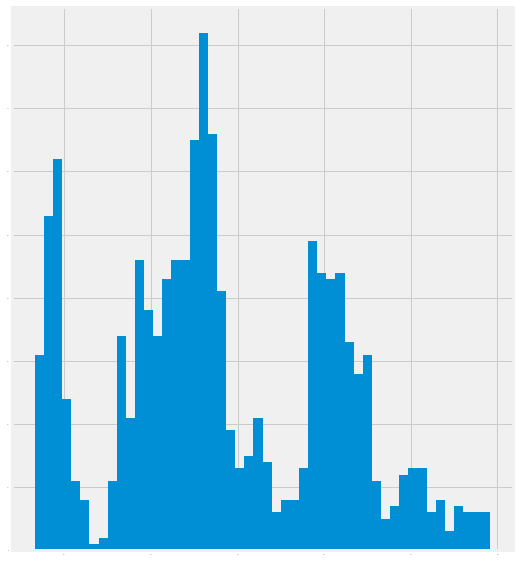

In [ ]:
#histogram
df["Adj Close"].hist(bins=50, xlabelsize=1, ylabelsize=1, figsize=(8,10))
pyplot.show()

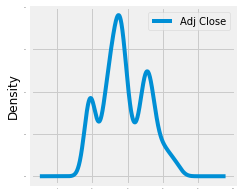

In [ ]:
#density
df["Adj Close"].plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

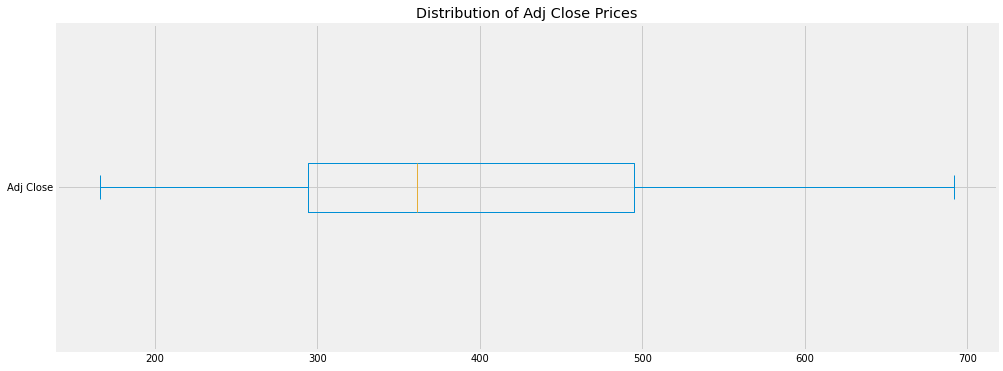

In [ ]:
#Box plots
fig, ax = plt.subplots(figsize=(15, 6))
df["Adj Close"].plot(kind="box", vert=False ,title="Distribution of Adj Close Prices", ax=ax);

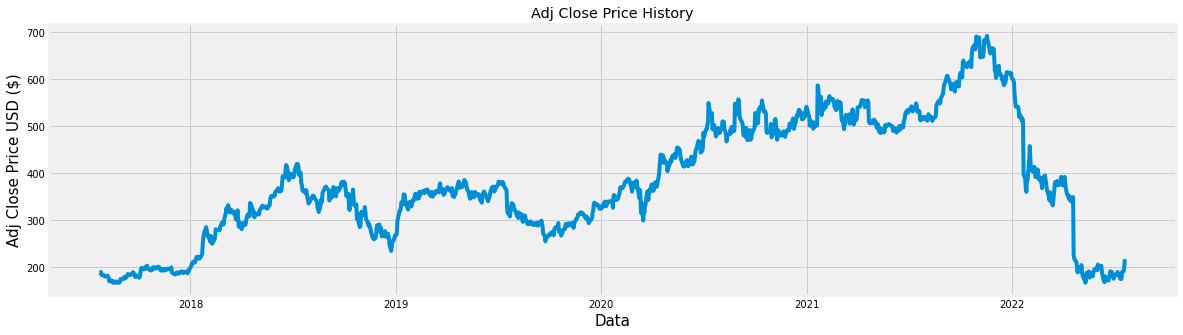

In [ ]:
#Visualize the Adj closing price history
plt.figure(figsize=(18,5))
plt.plot(df['Adj Close'])
plt.title('Adj Close Price History')
plt.xlabel('Data', fontsize=15 )
plt.ylabel('Adj Close Price USD ($)', fontsize=15)
plt.show()

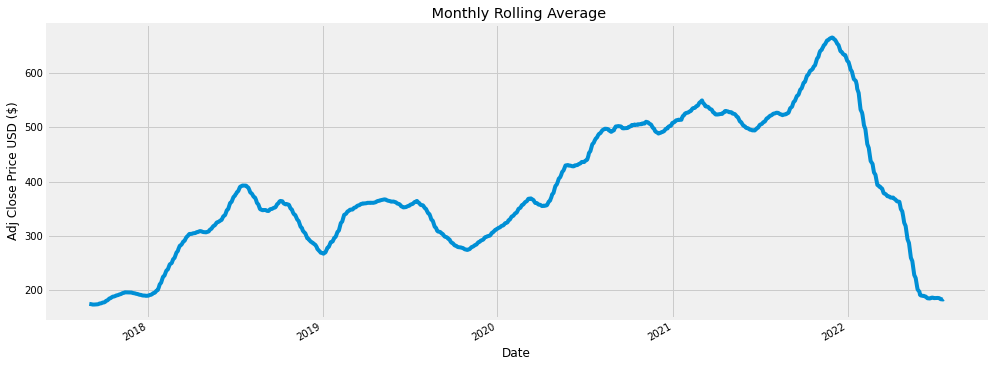

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Adj Close"].rolling(30).mean().plot(ax= ax, ylabel="Adj Close Price USD ($)", title=" Monthly Rolling Average");

Looking for the stock's performance by years based on Agj_Close price.

In [ ]:
df_2017= df.loc["2017"].copy()
df_2018= df.loc["2018"].copy()
df_2019= df.loc["2019"].copy()
df_2020= df.loc["2020"].copy()
df_2021= df.loc["2021"].copy()
df_2022= df.loc["2022"].copy()

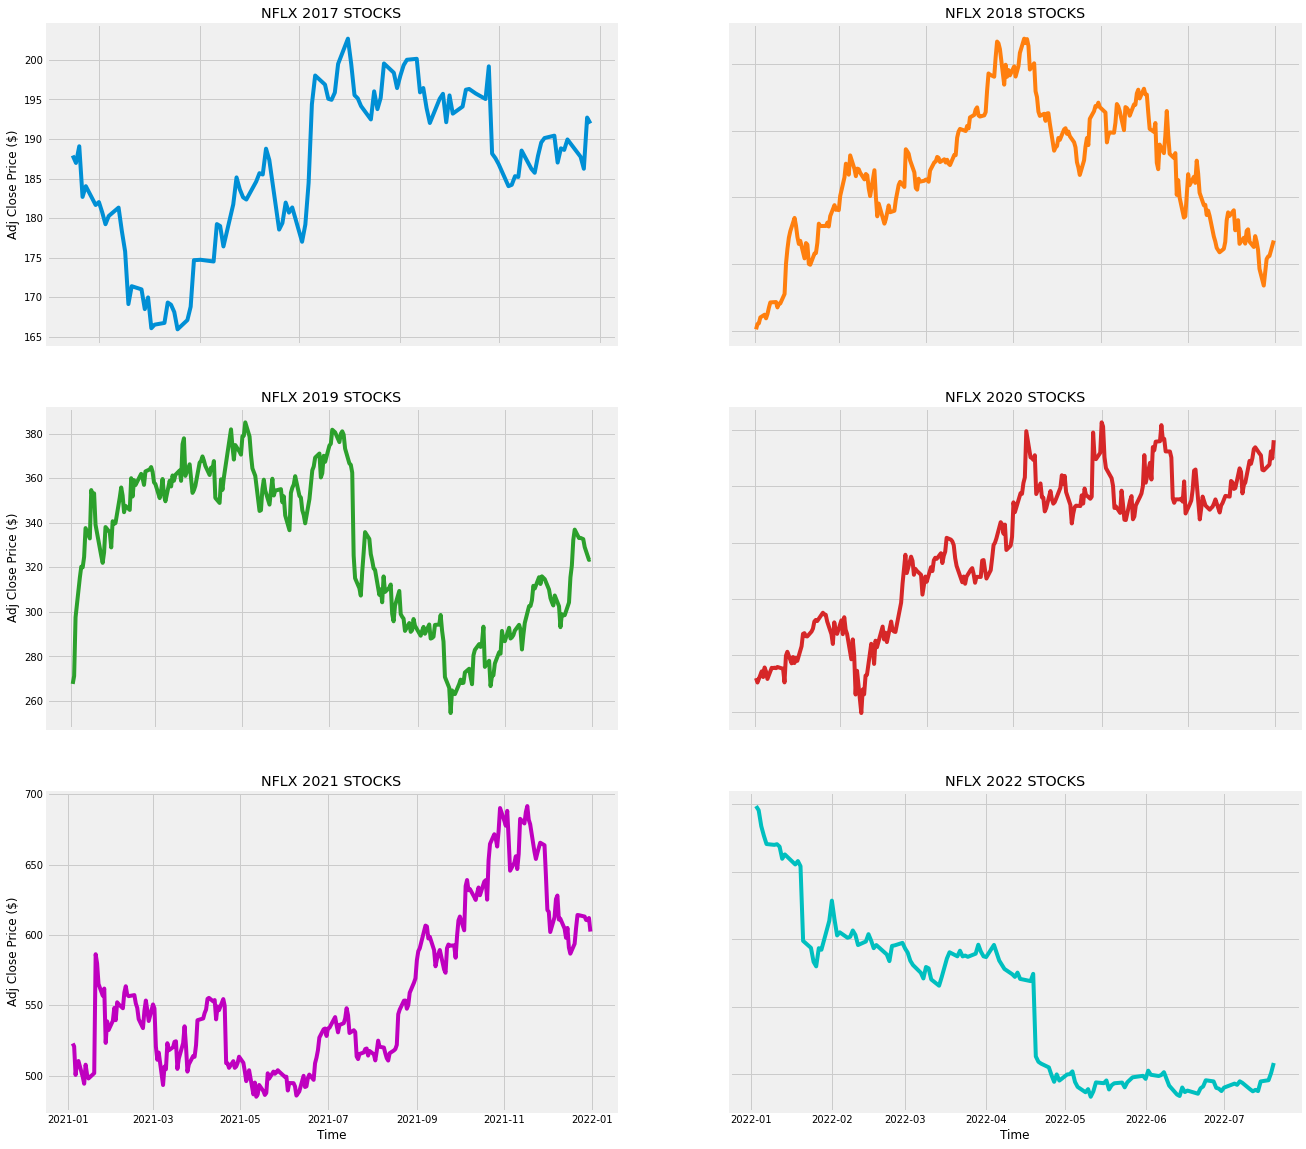

In [ ]:
fig, axs = plt.subplots(3, 2,figsize=(20, 20))

axs[0, 0].plot(df_2017)
axs[0, 0].set_title('NFLX 2017 STOCKS')

axs[0, 1].plot(df_2018, 'tab:orange')
axs[0, 1].set_title('NFLX 2018 STOCKS')

axs[1, 0].plot(df_2019, 'tab:green')
axs[1, 0].set_title('NFLX 2019 STOCKS')

axs[1, 1].plot(df_2020, 'tab:red')
axs[1, 1].set_title('NFLX 2020 STOCKS')

axs[2, 0].plot(df_2021, color='m')
axs[2, 0].set_title('NFLX 2021 STOCKS')

axs[2, 1].plot(df_2022, color='c')
axs[2, 1].set_title('NFLX 2022 STOCKS')


for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Adj Close Price ($)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### Time Series Analysis

Time series broken down into different time series comonent.

<Figure size 1296x360 with 0 Axes>

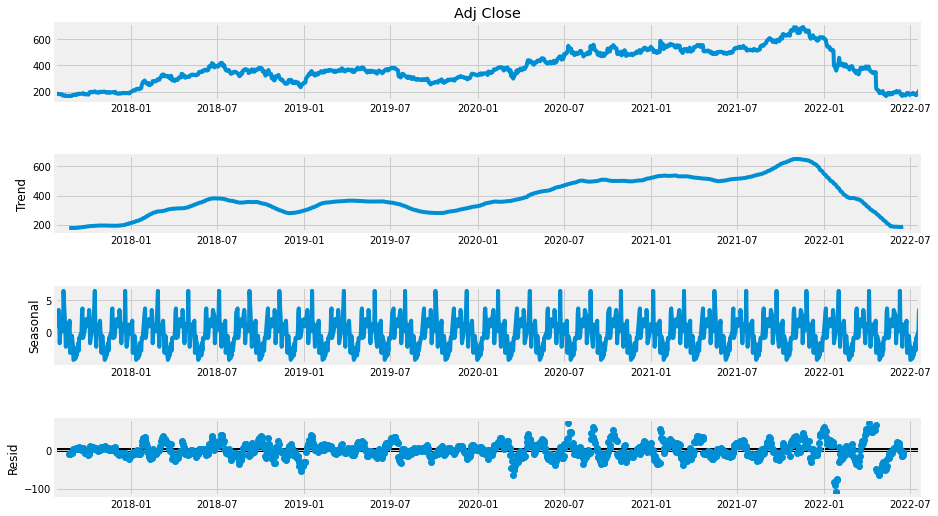

In [ ]:
res = sm.tsa.seasonal_decompose(df["Adj Close"],period=45)
plt.figure(figsize=(18,5))
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

# Building The Models

## Linear Regression

Creating a column called "Adj Close.L1" that contains the mean "Adj Close" price value from the previous day. 

Since this new feature will create NaN values in the
DataFrame,we must be sure to also drop null rows from the df.

In [ ]:
df["Adj Close.L1"] = df["Adj Close"].shift(1)
df.dropna(inplace=True)

Creating a correlation matrix for the df.

In [ ]:
df.corr()

,Adj Close,Adj Close.L1
Adj Close,1.000000,0.996346
Adj Close.L1,0.996346,1.000000


Creating a scatter plot that shows the Adj close price mean reading for each day as a function of
 the mean reading from the previous day.

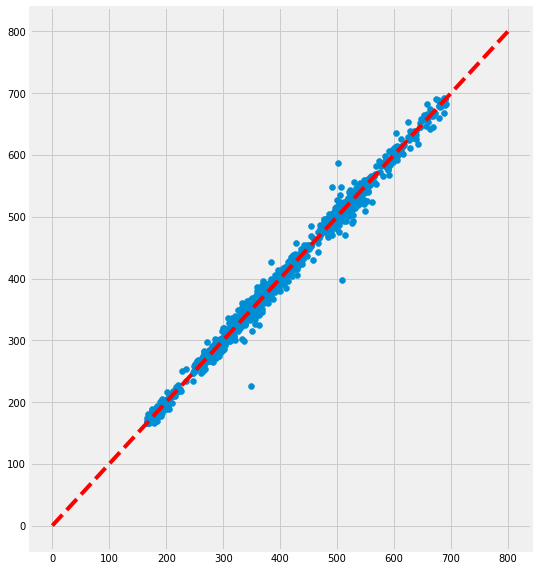

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.scatter(x=df["Adj Close.L1"], y=df["Adj Close"])
ax.plot([0,800],[0,800],linestyle="--", color="red")
plt.xlabel='Adj Close.L1'
plt.ylabel='Adj Close'
plt.title='Adj Close Prices Autocorrelation';

### Split

Splitting the DataFrame df into the feature matrix X and the target vector y. The
target is "Adj Close".

In [ ]:
target = "Adj Close"
y = df[target]
X = df.drop(columns= target)

Splitting X and y into training and test sets. The first 80% of the data in 
the training set. The remaining 20% should in the test set.

In [ ]:
cutoff = int(len(X) * 0.8)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

### Build Model

#### The Baseline

Calculating the baseline mean absolute error for the model.

In [ ]:
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Adj Close Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Adj Close Reading: 366.79
Baseline MAE: 87.05


####  Iterate

Instantiating a LinearRegression model named model, and fit it to the training
data.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Evaluate

Calculating the training and test mean absolute error for our model.

In [ ]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 6.65
Test MAE: 8.9


### Results

Extracting the intercept and coefficient from the model.

In [ ]:
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)[0]
print(f"Price = {intercept} + ({coefficient} * Adj Close.L1)")

Price = 1.92 + (1.0 * Adj Close.L1)


Creating a DataFrame df_pred_test that has two columns: "y_test" and "y_pred".

The first contains the true values for the test set, and the second contains the
 model’s predictions.

In [ ]:
df_pred_test = pd.DataFrame(
{
"y_test": y_test,
"y_pred": model.predict(X_test)
}
)
df_pred_test.head()

,y_test,y_pred
Date,,
2021-07-21,513.630005,530.682104
2021-07-22,511.769989,513.337223
2021-07-23,515.409973,511.485226
2021-07-26,516.489990,515.109518
2021-07-27,518.909973,516.184879


Creating a time series line plot for the values in test_predictions using plotly
express.

In [ ]:
fig = px.line(df_pred_test, labels= {"value": "Price"})
fig.show()

## Autoregression Model (AR)

### Import Data

In [ ]:
df = pd.DataFrame(dataset["Adj Close"])

In [ ]:
df= df["Adj Close"]. resample("1D").mean().fillna(method="ffill").to_frame()

Reading the data from the df into the Series
y.

In [ ]:
y = df["Adj Close"].fillna(method='ffill')
y.head()

Date
2017-07-24    187.910004
2017-07-25    186.970001
2017-07-26    189.080002
2017-07-27    182.679993
2017-07-28    184.039993
Freq: D, Name: Adj Close, dtype: float64

### Explore

Creating an ACF plot for the data in y. The x-axis labelled as "Lag [Days]"
and the y-axis as "Correlation Coefficient".

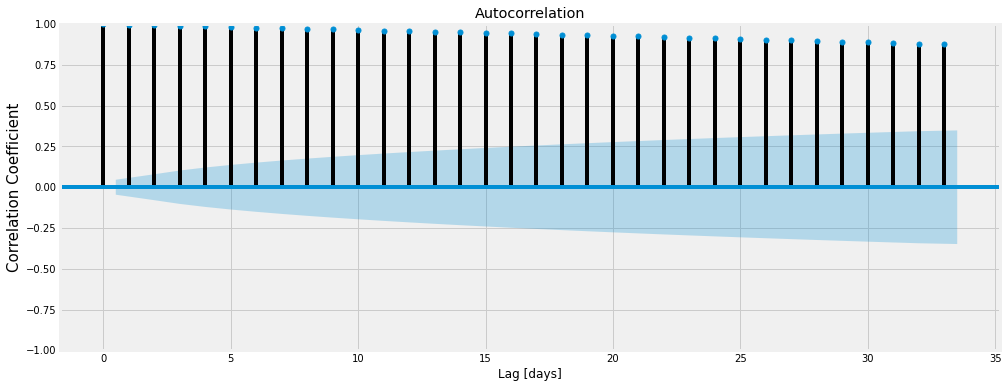

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y ,ax=ax)
plt.xlabel('Lag [days]', fontsize=15)
plt.ylabel('Correlation Coefficient', fontsize=15);
plt.show()

Create an PACF plot for the data in y. The x-axis labelled as "Lag [Days]"
and the y-axis as "Correlation Coefficient".

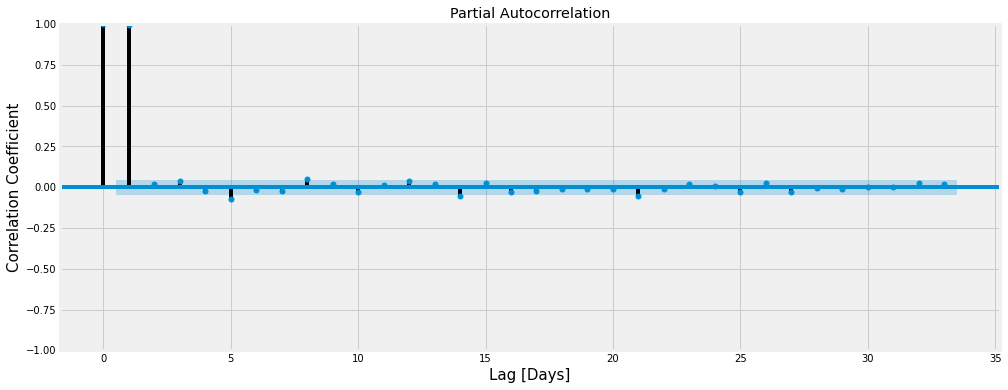

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y, ax = ax)
plt.xlabel('Lag [Days]', fontsize=15)
plt.ylabel('Correlation Coefficient', fontsize=15);

### Split

Splitting y into training and test sets. The first 95% of the data in the training
set. The remaining 5% in the test set.

In [ ]:
cutoff_test = int(len(y) * 0.95)
y_train = y.iloc[: cutoff_test]
y_test = y.iloc[cutoff_test : ]

### Building The Model

#### The Baseline

Calculating the baseline mean absolute error for the model.

In [ ]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Adj Close price:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Adj Close price Reading: 391.23
Baseline MAE: 101.85


#### Iterate

Instantiate an AutoReg model and fit it to the training data y_train. I set the lags argument to 5.

In [ ]:
model = AutoReg(y_train, lags = 5).fit()

Generating a list of training predictions for the model and use them to calculate the
training mean absolute error.

In [ ]:
y_pred = model.predict().dropna()
training_mae = mean_absolute_error(y_train.iloc[5:], y_pred)
print("Training MAE:", training_mae)

Training MAE: 5.13720429678184


Using y_train and y_pred to calculate the residuals for the model.

In [ ]:
y_train_resid = model.resid
y_train_resid.tail()

Date
2022-04-16     -0.421295
2022-04-17     -0.652602
2022-04-18     -2.684034
2022-04-19     10.432804
2022-04-20   -122.349085
Freq: D, dtype: float64

Creating a histogram of y_train_resid.

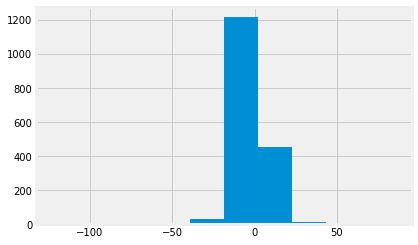

In [ ]:
y_train_resid.hist()
plt.xlabel("Residual value")
plt.ylabel("Frequency")

Creating a plot of y_train_resid.

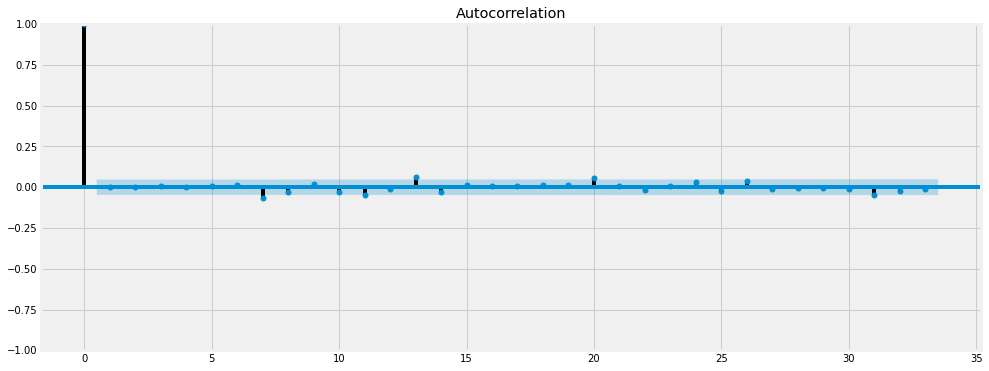

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y_train_resid, ax=ax);

#### Evaluate

Calculating the test mean absolute error for the model.

In [ ]:
y_pred_test = model.predict(y_test.index.min(), y_test.index.max())
test_mae = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", test_mae)

Test MAE: 61.30178397251795


Performing the walk-forward validation method for the model for the entire test set y_test. Storing 
the model’s predictions in the Series y_pred_wfv.

In [ ]:
%%capture
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = AutoReg(history, lags=5).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

Calculating the test mean absolute error for the model.

In [ ]:
test_mae = mean_absolute_error(y_test, y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 4.57


###  Results

Printing out the parameters for the trained model.

In [ ]:
print(model.params)

const           1.074670
Adj Close.L1    0.969909
Adj Close.L2   -0.020415
Adj Close.L3    0.053443
Adj Close.L4    0.068638
Adj Close.L5   -0.074335
dtype: float64


Putting the values for y_test and y_pred_wfv into the DataFrame df_pred_test. Then plotting df_pred_test using plotly express.

In [ ]:
df_pred_test = pd.DataFrame(
{"y_test": y_test, "y_pred_wfv": y_pred_wfv})
df_pred_test.head()

,y_test,y_pred_wfv
2022-04-25,209.910004,215.462466
2022-04-26,198.399994,210.422295
2022-04-27,188.539993,199.558010
2022-04-28,199.520004,189.902351
2022-04-29,190.360001,199.796549


In [ ]:
fig = px.line(df_pred_test, labels = {"value": "Adj Close Price"})
fig.show()

##Autoregressive Moving Average Model (ARMA)

### Import Data

Reading the data from the DataFrame df and collection into the Series
 y.

In [ ]:
df= df["Adj Close"]. resample("1D").mean().fillna(method="ffill").to_frame()

In [ ]:
y = df["Adj Close"]
y.head()

Date
2017-07-24    187.910004
2017-07-25    186.970001
2017-07-26    189.080002
2017-07-27    182.679993
2017-07-28    184.039993
Freq: D, Name: Adj Close, dtype: float64

### Split

Splitting y into training and test sets. The first 85% of the data should be in your training set. The remaining 15% should be in the test set.

In [ ]:
cutoff_test = int(len(y) * 0.85)
y_train = y.iloc[: cutoff_test]
y_test = y.iloc[cutoff_test : ]

### Build Model

#### Baseline Model

Calculating the baseline mean absolute error for the model.

In [ ]:
y_train_mean= y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline= mean_absolute_error(y_train, y_pred_baseline)
print("Mean Adj Close price:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 366.47
Baseline MAE: 87.09


#### Iterate

Creating ranges for possible p and q values. p_params range between 0 and 4,
by steps of 1. q_params range between 0 and 3 by steps of 1.

In [ ]:
p_params = range(0,4,1)
q_params = range(0,3,1)

Training a model with every combination of hyperparameters
in p_params and q_params. 

Every time the model is trained, the mean absolute error is calculated
and then saved to a dictionary.

In [ ]:
# Create dictionary to store MAEs
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
      # Create key-value pair in dict. Key is `p`, value is empty list.
      mae_grid[p] = list()
      # Inner loop: Iterate through possible values for `q`
      for q in q_params:
           # Combination of hyperparameters for model
           order = (p, 0, q)
           # Note start time
           start_time = time.time()
           # Train model
           model = ARIMA(y_train, order=order).fit()
           # Calculate model training time
           elapsed_time = round(time.time() - start_time, 2)
           print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
           # Generate in-sample (training) predictions
           y_pred = model.predict()
           # Calculate training MAE
           mae = mean_absolute_error(y_train, y_pred)
           # Append MAE to list in dictionary
           mae_grid[p].append(mae)

     
print()
print(mae_grid)

Trained ARIMA (0, 0, 0) in 0.25 seconds.
Trained ARIMA (0, 0, 1) in 0.47 seconds.
Trained ARIMA (0, 0, 2) in 1.19 seconds.
Trained ARIMA (1, 0, 0) in 0.22 seconds.
Trained ARIMA (1, 0, 1) in 0.61 seconds.
Trained ARIMA (1, 0, 2) in 1.12 seconds.
Trained ARIMA (2, 0, 0) in 0.62 seconds.
Trained ARIMA (2, 0, 1) in 0.55 seconds.
Trained ARIMA (2, 0, 2) in 2.68 seconds.
Trained ARIMA (3, 0, 0) in 0.82 seconds.
Trained ARIMA (3, 0, 1) in 1.73 seconds.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Trained ARIMA (3, 0, 2) in 3.43 seconds.

{0: [87.09497944601515, 46.1751390180624, 28.190254994641442], 1: [4.761618973181979, 4.783573451060062, 4.798423837700547], 2: [4.77931247297063, 4.791874638056229, 4.801712196526427], 3: [4.802407917959454, 4.80188406373758, 4.8529168272920655]}


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Organising all the MAE’s from above in a DataFrame names mae_df.

In [ ]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,1,2,3
0,87.0950,4.7616,4.7793,4.8024
1,46.1751,4.7836,4.7919,4.8019
2,28.1903,4.7984,4.8017,4.8529


Using the plot_diagnostics method to check the residuals for the model.

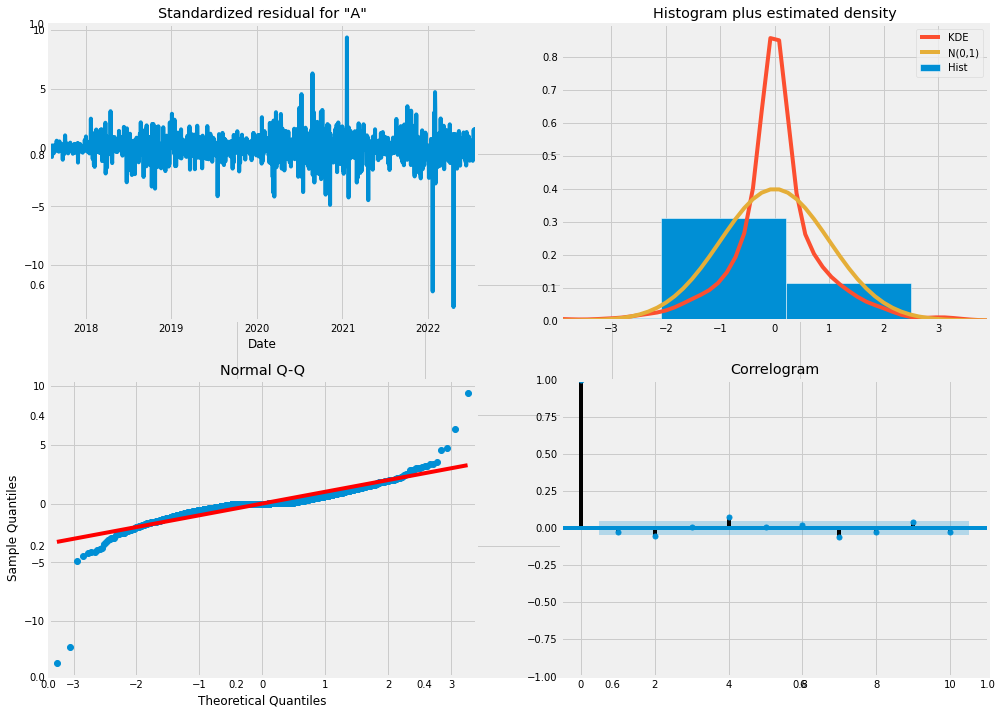

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig);

#### Evaluate

Performing the walk-forward validation method for the model for the
entire test set y_test. 

Storing the model’s predictions in the Series y_pred_wfv. Then, Choosing the values
for p and q that best balance model performance and computation time.

In [ ]:
y_pred_wfv = pd.Series()
history = y_train.copy()

for i in range(len(y_test)):
     model = ARIMA(history, order=(1,0,0)).fit()
     next_pred = model.forecast()
     y_pred_wfv = y_pred_wfv.append(next_pred)
     history = history.append(y_test[next_pred.index])

In [ ]:
test_mae = mean_absolute_error(y_test, y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 6.18


### Results

Plotting df_predictions using plotly express.

In [ ]:
df_predictions = pd.DataFrame({"y_test": y_test,"y_pred_wfv": y_pred_wfv})
df_predictions.head()

,y_test,y_pred_wfv
2021-07-22,511.769989,513.313121
2021-07-23,515.409973,511.449330
2021-07-24,515.409973,515.091970
2021-07-25,515.409973,515.092554
2021-07-26,516.489990,515.093136


In [ ]:
fig = px.line(df_predictions, labels = {"value": "Adj Close Price"})
fig.show()

# Conclusion

After we build the three models, we see that the Autoregression Model is the accurate model in predicting the stock's price.

In the future, additional models can be built using different algorithms to reach the best results that will help those interested in Netflix stock prices.